In [1]:
import pandas as pd

import wmfdata as wmf

In [5]:
wmf.charting.set_mpl_style()

In [3]:
SPARK_PARTITION_DATE = (
    "CONCAT("
        "CAST(year AS STRING), '-', "
        "LPAD(CAST(month AS STRING), 2, '0'), '-', "
        "LPAD(CAST(day AS STRING), 2, '0')"
    ")"
)

# Both start and end dates are included
START_DATE = "2021-12-15"
END_DATE = "2022-01-09"

experiment_events = wmf.spark.run(f"""
SELECT
    DATE(TO_TIMESTAMP(meta.dt)) AS time,
    COUNT(*) AS experiment_events
FROM event.inukapageview
WHERE
    {SPARK_PARTITION_DATE} BETWEEN '{START_DATE}' AND '{END_DATE}'
    AND SIZE(event.tests) > 0
    AND event.is_production
GROUP BY DATE(TO_TIMESTAMP(meta.dt))
""")

experiment_events = (
    experiment_events
    .assign(time=lambda df: pd.to_datetime(df["time"]))
    .set_index("time")
)

PySpark executors will use /usr/lib/anaconda-wmf/bin/python3.


PYSPARK_PYTHON=/usr/lib/anaconda-wmf/bin/python3


SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/lib/spark2/jars/slf4j-log4j12-1.7.16.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/lib/hadoop/lib/slf4j-log4j12-1.7.25.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/01/10 00:43:56 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).
22/01/10 00:43:57 WARN Utils: Service 'sparkDriver' could not bind on port 12000. Attempting port 12001.
22/01/10 00:43:57 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/01/10 00:44:06 WARN U

Despite configuring the experiment to shut down after 2022-01-07, clients are still sending events tagged with experiment membership.

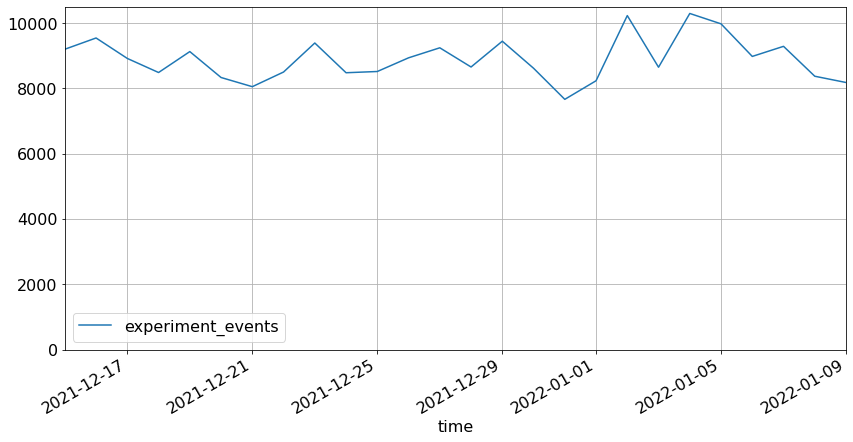

In [7]:
experiment_events.plot(ylim=(0, 10_500));

However, a check of the simulator shows that the recommendations are no longer being displayed to installs in the trending articles group. We can consider the experiment successfully shut down even if events are still being tagged with the experiment groups in the background. The experiment code should be removed from the codebase soon, which would naturally  next release would cause the experiment group tagging to be removed.